# CIFTI parcellation and surface plotting

Comet offers parcellation with many different atlasses. Not all combinations are possible, but many are.

- Schaefer, Glasser, Gordon
- Different resolutions (e.g. Schaefer 100-1000)
- Cortical only or including subcortical parcels (4 different scales)
- Yeo 7 or 17 networks
- Different network ordering

As an example, we can parcellate a CIFTI file from the Human Connectome Project with the Schaefer 200 parcellation (cortical only):

Parcellated time series has shape: (1200, 200)


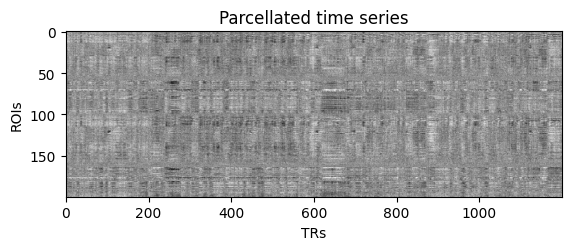

In [1]:
from comet import cifti
from matplotlib import pyplot as plt

dtseries = "/mnt/rosa/hcpya25/restingstate/100307/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean_rclean_tclean.dtseries.nii"
ts = cifti.parcellate(dtseries, atlas="schaefer", resolution=200, networks=7)

print("Parcellated time series has shape:", ts.shape)

fig, ax = plt.subplots()
ax.imshow(ts.T, cmap="Grays", aspect=2)
ax.set(xlabel="TRs", ylabel="ROIs", title="Parcellated time series");

If we pass the `return_labels=True` argument, we will get more returns, which we can use for surface plotting. 

- `ts`: parcellated time series (shape: n_rois x n_timepoints)
- `node_labels`: string label of each ROI provided by the atlas
- `vertex_labels`: integer ROI label for each vertex in the cifti (required for plotting)
- `rgba`: rgb color tuple provided by the atlas (unused in our plotting)

We can further use the `cifti.get_networks()` function with the node labels to obtain additional information for plotting.

- `networks`: string labels for all ROIs containing the network information
- `network_ids`: integer version of `networks` for convenience
- `hemisphere`: list containing the hemisphere assignment (left/right)
- `network_map`: dict which combines `networks`and `network_ids` for convenience

In [2]:
ts, node_labels, vertex_labels, rgba  = cifti.parcellate(dtseries, atlas="schaefer", resolution=200, networks=7, return_labels=True)
networks, network_ids, hemisphere, network_map = cifti.get_networks(node_labels)

print("Network map:")
print(network_map.items())

Network map:
dict_items([('Cont', 1), ('Default', 2), ('DorsAttn', 3), ('Limbic', 4), ('SalVentAttn', 5), ('SomMot', 6), ('Vis', 7)])


This information is enough to generate a surface plot with `cifti.surface_plot()`. For example, we can plot the networks associated with each ROI. The method contains many adjustable parameters listed below.

Notably, plots can also be opened in an interactive 3D viewer by setting `interactive=True`. If a filename is provided, a static figure is saved with various file formats. Any manipulations performed in the 3D viewer will be saved as well.

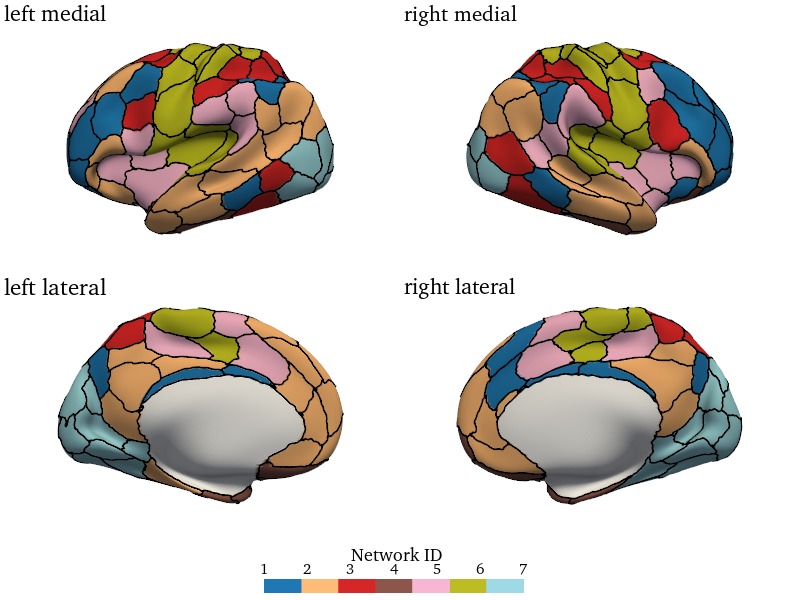

In [6]:
cifti.surface_plot(node_values=network_ids, vertex_labels=vertex_labels, 
                   hemi="both", surface="very_inflated",
                   view_names=("medial", "lateral"), ncols=2, colwise=True,
                   cmap="tab20", size=[800, 600], distance=450,
                   border_width=2, border_color="black", 
                   colorbar="bottom", colorbar_label="Network ID", labelsize=15,
                   interactive=False, fname=None)

The same function can be used to plot other measures to the surface. An example would be the clustering coefficient of each node:

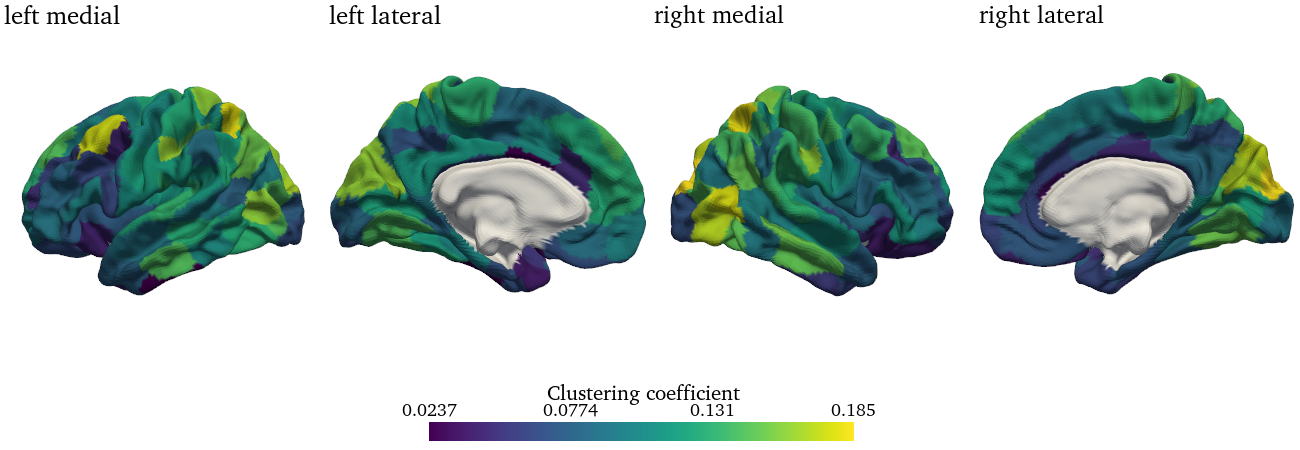

In [ ]:
from comet import connectivity, graph

# Estimate static FC
fc = connectivity.Static_Pearson(ts, diagonal=0, fisher_z=True).estimate()

# Process and calculate nodal clustering
G = graph.handle_negative_weights(fc, type="discard")
G = graph.minmax_scale(G)
clustering_coef = graph.clustering_coef(G)

# Plot
cifti.surface_plot(clustering_coef, vertex_labels, 
                   surface="midthickness_mni", colorbar_label="Clustering coefficient",
                   hemi="both", ncols=4, size=[1300, 450], interactive=False)